<a href="https://colab.research.google.com/github/AmrAbdulazim/Reverse-Engineering-the-H1-Neuron-s-Motion-Filter/blob/main/CompNeuro_Python_Foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🟢 Section 1: Array Construction and Dimensional Analysis**

In [ ]:
# Import the numpy library
import numpy as np

# Create a time array from 0 to 100 with a step of 0.1
time_vector = np.arange(0, 100, 0.1)

# Create a voltage array of zeros with the same size as the time array
voltage_vector = np.zeros(time_vector.size)

# Print the shapes of both arrays to verify they match
print(time_vector.shape, voltage_vector.shape)

(1000,) (1000,)


#**🔵 Section 2: Data Slicing and Boolean Masking (Vectorization)**

In [ ]:
# Create a noisy neural activity vector with 20 samples
neural_activity = np.random.rand(20)

# Apply a threshold mask to extract high-activity signals (> 0.8)
strong_signals = neural_activity > 0.8

print(strong_signals)

[False  True False  True False False False  True False  True  True False
 False  True False  True  True False  True False]


# **🔴 Section 3: Array Mathematics and Broadcasting**

In [ ]:
# Create a voltage array
voltage = np.array([-75, -62, -50, -85, -70])

#Claculate the current through Ohm's Law (V = I x R)
current = (voltage - (-70))/10

print(current)

[-0.5  0.8  2.  -1.5  0. ]


# **🟡 Section 4: Linear Algebra & Dot Product (Synaptic Integration)**

In [ ]:
# Create the inputs array
inputs = np.array([2, 3, -1])

# Create the weights array
weights = np.array([0.5, 0.1, 0.8])

# Integrate the inputs using dot product
total_responses = np.dot(inputs, weights)

print(total_responses)

0.5


# 🟣 **Section 5: Scientific Visualization (Matplotlib Basics)**

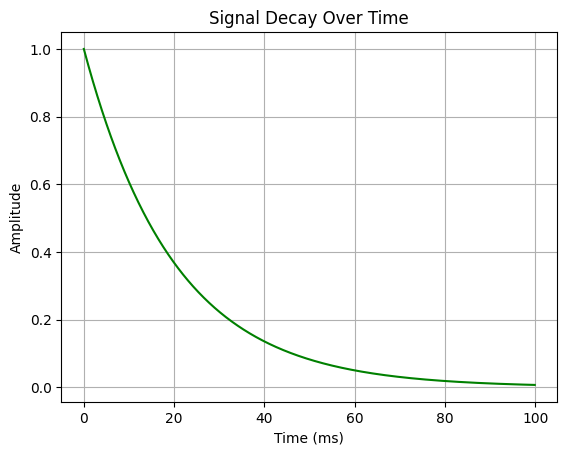

In [ ]:
import matplotlib.pyplot as plt

# Computes exponential decay using e^(-k*t).
# Essential in CompNeuro for modeling signal dissipation.
decay_signals = np.exp(-0.05 * time_vector)

plt.plot(time_vector, decay_signals, color='green')

# Standard plot annotations
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Signal Decay Over Time')

# Adds a coordinate grid to assist in visual data alignment
plt.grid(True)

#**🟠 Section 6: Introduction to Neural Modeling (LIF)**

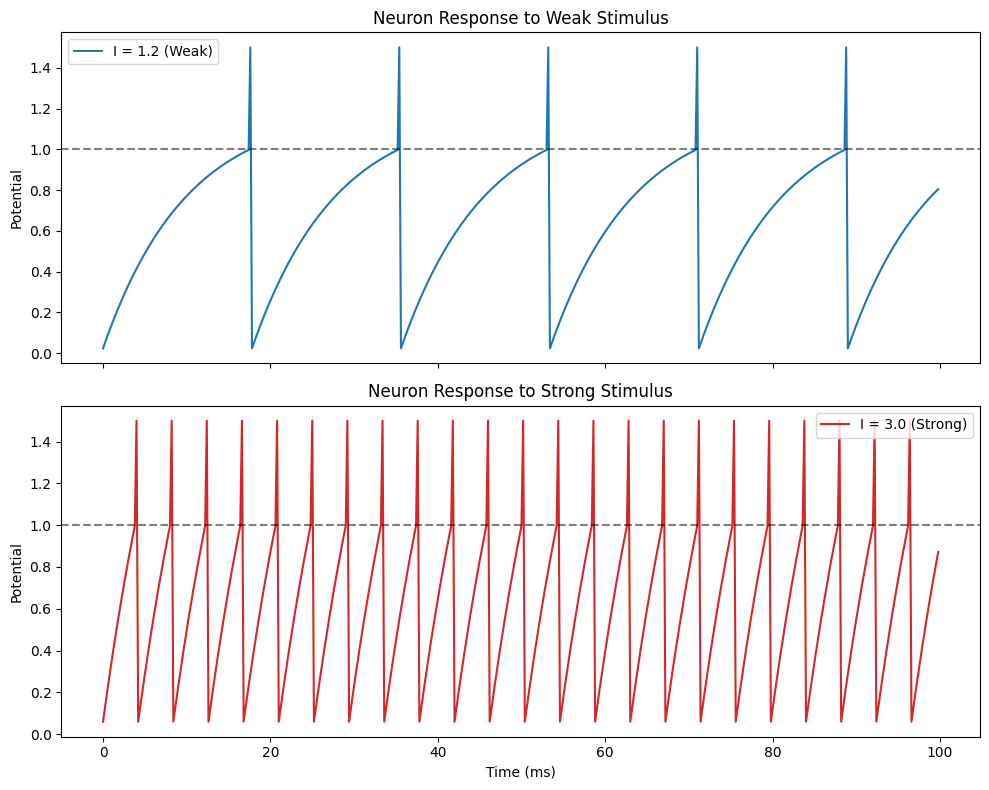

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
dt = 0.2              # Time step in ms
tau = 10              # Membrane time constant
threshold = 1.0       # Firing threshold
time = np.arange(0, 100, dt)

def simulate_lif(I_input):
    v = 0.0
    v_history = []
    for t in time:
        # LIF Equation: Leak + Input
        dv = (dt / tau) * (-v + I_input)
        v += dv

        # Spike and Reset logic
        if v >= threshold:
            v_history.append(1.5) # Visualize spike higher than threshold
            v = 0.0               # Reset potential
        else:
            v_history.append(v)
    return v_history

# Run simulations
v_weak = simulate_lif(I_input=1.2)
v_strong = simulate_lif(I_input=3.0)

# --- Professional Visualization ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Subplot 1: Weak Input
ax1.plot(time, v_weak, color='tab:blue', label='I = 1.2 (Weak)')
ax1.axhline(threshold, color='black', linestyle='--', alpha=0.5)
ax1.set_title('Neuron Response to Weak Stimulus')
ax1.set_ylabel('Potential')
ax1.legend()

# Subplot 2: Strong Input
ax2.plot(time, v_strong, color='tab:red', label='I = 3.0 (Strong)')
ax2.axhline(threshold, color='black', linestyle='--', alpha=0.5)
ax2.set_title('Neuron Response to Strong Stimulus')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Potential')
ax2.legend()

plt.tight_layout()
plt.show()

#**🟤 Section 7: Synaptic Transmission & Neural Connectivity**

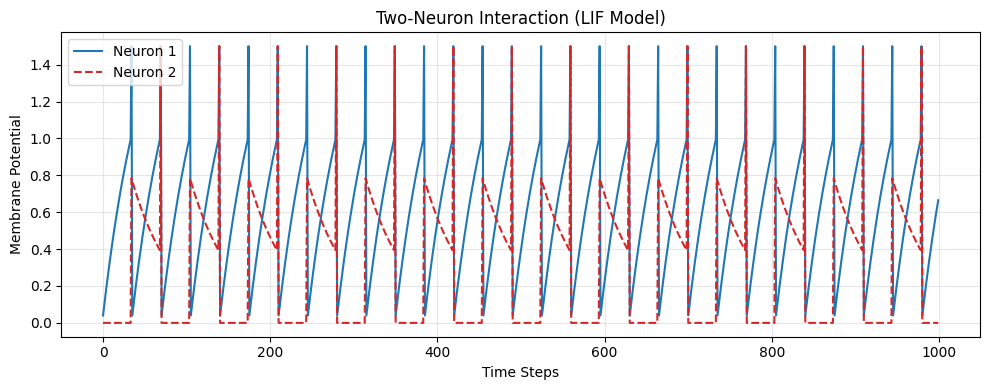

In [ ]:
import matplotlib.pyplot as plt

# Initialization
v1, v2 = 0.0, 0.0
v1_history, v2_history = [], []
I1, I2 = 2.0, 0.0
weight = 0.8

# Simulation loop
for t in time_vector:
    # Update Neuron 1 membrane potential
    dv1 = (dt / tau) * (-v1 + I1)
    v1 += dv1

    # Check threshold for Neuron 1
    if v1 >= threshold:
        v1 = 0.0
        v1_history.append(1.5) # Visual spike
        v2 += weight           # Synaptic input to Neuron 2
    else:
        v1_history.append(v1)

    # Update Neuron 2 membrane potential
    dv2 = (dt / tau) * (-v2 + I2)
    v2 += dv2

    # Check threshold for Neuron 2
    if v2 >= threshold:
        v2 = 0.0
        v2_history.append(1.5) # Visual spike
    else:
        v2_history.append(v2)

# Basic plot styling
plt.figure(figsize=(10, 4))
plt.plot(v1_history, label='Neuron 1', color='tab:blue', linewidth=1.5)
plt.plot(v2_history, label='Neuron 2', color='tab:red', linestyle='--', linewidth=1.5)

# Plot labeling
plt.title('Two-Neuron Interaction (LIF Model)')
plt.xlabel('Time Steps')
plt.ylabel('Membrane Potential')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()